# Clasificación

Un algoritmo de clasificación es aquel que ordena o divide los datos de entrada en **categorías** (en adelante, **clases**). Uno de los ejemplos más comunes puede ser un filtro de spam, que clasifica los correos según sean o no spam.

Podemos encontrar estos algoritmos en funcionamiento en multitud de ámbitos, desde redes sociales a encuestas, pasando por análisis de textos.

# Unos cuantos algoritmos de clasificación

La última vez vimos la regresión logística, muy relacionada con el temario tratado anteriormente. Ahora, vamos a ver los algoritmos de clasificación con mayor influencia a lo largo de los últimos años, cada uno tiene una serie de hiperparámetros que podemos ajustar y suelen ser recomendables en circunstancias concretas.

Vamos a utilizar este conjunto de datos de `sklearn`:

In [22]:
from sklearn import datasets
from sklearn import metrics

import pandas as pd

wine = datasets.load_wine()

X = pd.DataFrame(data=wine.data, columns=wine['feature_names'])
y = pd.DataFrame(data=wine.target, columns=['target'])

Lo vamos a dividir en datos de entrenamiento y test. Utilizaremos estos datos con todos los modelos para comparar su funcionamiento.

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Árboles de decisión

Quizá sea el algoritmo más intuitivo de todos. Su objetivo es construir una jerarquía con los datos de entrada, y se basa en una serie de condiciones (sentencias if-else). Las ramas se desarrollan dividiendo el conjunto de datos basándose en sus atributos más importantes. Los árboles de decisión son **modelos explicativos*, ya que comparten la lógica de toma de decisiones interna, a diferencia de, por ejemplo, las redes neuronales. Estos últimos se denominan algoritmos de *caja negra*.

Otra ventaja a su favor es que su complejidad de entrenamiento es menor que la de otros algoritmos clásicos.

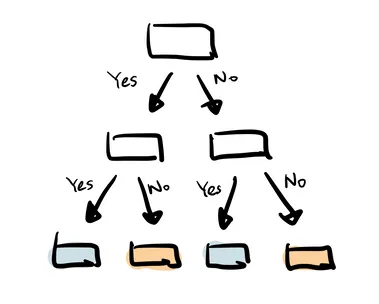

Los árboles de decisión seleccionan el mejor atributo para empezar a dividir mediante **medidas de selección de atributos** (ASM) y crear conjuntos más pequeños. A partir de ahí, se sigue un proceso recursivo hasta que se haya recorrido el dataset entero o no queden más atributos por analizar.

### Medidas de selección de atributos

Veamos las dos principales medidas:

#### Coeficiente o impureza de Gini

Se obtiene a partir de la siguiente fórmula:

$\begin{eqnarray}Gini(D) = 1 - \sum_{i\in C}^{}p_i^2\end{eqnarray}$

Donde $p_i$ es la probabilidad de que una observación (fila).<br> 
* Toma valores entre 0 y 1, y sirve para medir la variabilidad en una distribución. 
* Se selecciona el atributo con el **coeficiente más bajo** (menor variabilidad) para empezar a dividir.

#### Ganancia de información / entropía

La ganancia de información consiste en disminuir la entropía, es decir, la "impureza" de los datos. Se calcula con la diferencia entre la entropía antes de dividir y la entropía media después de dividir (como en los ejercicios de la asignatura de IA de 2º curso).

Se calcula de la siguiente manera: 

$\begin{eqnarray}
H(T) &=& -\sum_{i\in C}^{}p_i \log_2(p_i) \\
\end{eqnarray}$

donde $C$ es el conjunto de clases y $p_i$ es la probabilidad de que una observación (fila) del conjunto de datos pertenezca a la clase $i$.

### Ejemplo del modelo

Vamos a entrenar un árbol de decisión con los datos definidos anteriormente:

In [24]:
from sklearn.tree import DecisionTreeClassifier

arbol = DecisionTreeClassifier(criterion='entropy', splitter='random', max_depth=3, random_state=42)
arbol = arbol.fit(X_train,y_train)

Veamos la calidad de sus predicciones con el conjunto de validación:

In [25]:
print("Accuracy:", metrics.accuracy_score(y_test, arbol.predict(X_test)))
print("F1:", metrics.f1_score(y_test, arbol.predict(X_test), average='weighted'))

Accuracy: 0.8444444444444444
F1: 0.8419117647058825


Veamos entonces cómo se obtiene el árbol, es una información muy valiosa. Para ello se convierte en un grafo el árbol y se muestra por pantalla.

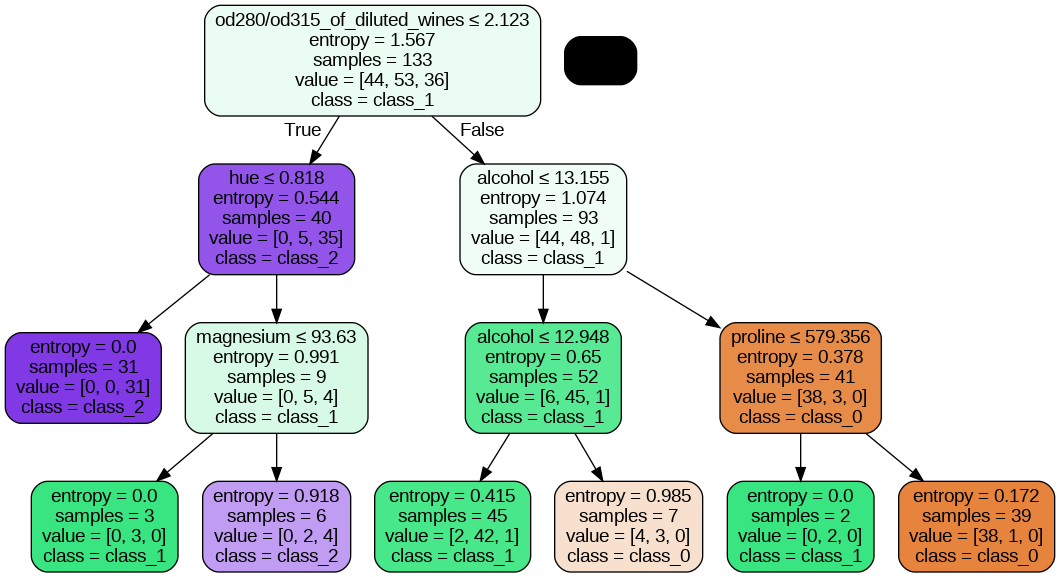

In [26]:
from six import StringIO 
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image  

dot_data = StringIO()
export_graphviz(arbol, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, 
                feature_names=wine.feature_names, class_names=wine.target_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## Random Forest

Se trata de una colección de árboles de decisión. Es un tipo de `ensemble` que tiene en cuenta los resultados de varios árboles. Estos árboles se entrenan con una porción aleatoria de los datos de entrenamiento.

Normalmente, suelen dar mejores resultados que los árboles de decisión individuales, pero es menos explicativo, ya que resulta muy complicado y costoso representar todos los árboles gráficamente. Además, son propensos al overfitting, ¡Cuidado!

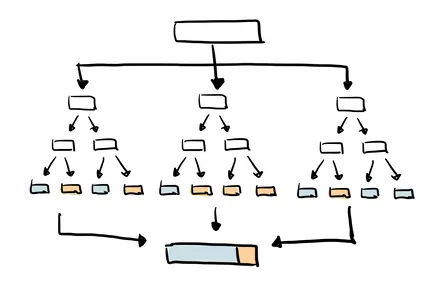

Veamos cómo se comporta con los mismos datos:

In [27]:
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier(n_estimators=8, max_samples=0.3, random_state=42)
randomforest.fit(X_train, y_train)

<ipython-input-27-8976dbe96320>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randomforest.fit(X_train, y_train)


RandomForestClassifier(max_samples=0.3, n_estimators=8, random_state=42)

Y sus métricas:

In [28]:
print("Accuracy:", metrics.accuracy_score(y_test, randomforest.predict(X_test)))
print("F1:", metrics.f1_score(y_test, randomforest.predict(X_test), average='weighted'))

Accuracy: 0.8666666666666667
F1: 0.8631410256410257


Un problema que tienen los random forest, sin embargo, es que tienden al overfitting, veamos qué pasa con un random forest sin parámetros y un `random_state` de 42:

In [29]:
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)

<ipython-input-29-d0412cdecb94>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [30]:
print("Accuracy:", metrics.accuracy_score(y_test, rfc.predict(X_test)))
print("F1:", metrics.f1_score(y_test, rfc.predict(X_test), average='weighted'))

Accuracy: 1.0
F1: 1.0


¡Overfitting!

## K-Nearest Neighbour (KNN)

Es un algoritmo que calcula la distancia entre los datos (representados como puntos en un espacio n-dimensional) y asigna la clase a un dato en función de las de sus k vecinos.

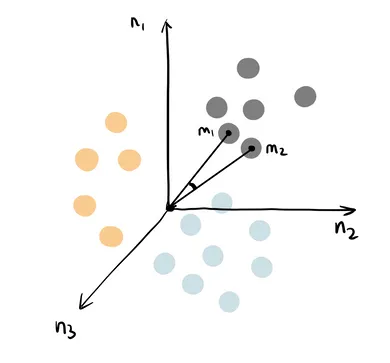

El proceso es el siguiente, como se describe anteriormente:
1. Calcular la distancia entre el punto a tratar y los demás
2. Determinar los k puntos más cercanos
3. Determinar la clase del punto dado en función de la clase a la que pertenecen sus k vecinos

Como puntos a favor tiene que es un algoritmo relativamente sencillo, y que además permite la clasificación multiclase.

Veamos su desempeño:

In [31]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [32]:
print("Accuracy:", metrics.accuracy_score(y_test, knn.predict(X_test)))
print("F1:", metrics.f1_score(y_test, knn.predict(X_test), average='weighted'))

Accuracy: 0.7111111111111111
F1: 0.7111111111111111


## Support Vector Machine (SVM)


Se trata de una técnica de separación lineal (tanto binaria como multiclase) que, como curiosidad, también puede aplicarse a problemas de regresión. Consiste en encontrar una frontera (o [hiperplano](https://es.wikipedia.org/wiki/Hiperplano)) que maximice la distancia entre los puntos de distintas clases. SVC (Support Vector Classifier) en concreto es el clasificador con el que vamos a trabajar.

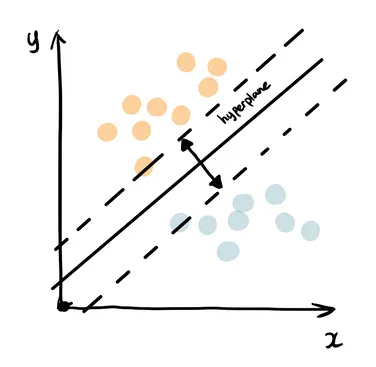

In [33]:
from sklearn.svm import SVC
svc = SVC(random_state=42)
svc.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(random_state=42)

In [34]:
print("Accuracy:", metrics.accuracy_score(y_test, svc.predict(X_test)))
print("F1:", metrics.f1_score(y_test, svc.predict(X_test), average='weighted'))

Accuracy: 0.7111111111111111
F1: 0.7015873015873016


# Fuentes:

Imágenes:
* https://towardsdatascience.com/top-machine-learning-algorithms-for-classification-2197870ff501

Árboles de decisión:
* https://link.springer.com/article/10.1007/s10888-011-9188-x
* https://link.springer.com/article/10.1023/a:1022643204877?utm_source=getftr&utm_medium=getftr&utm_campaign=getftr_pilot

Ejemplo gráfico del árbol obtenidos del material de los profesores **Raúl Lara Cabrera** (raul.lara@upm.es) y **Fernando Ortega** (fernando.ortega@upm.es)

<img src="https://licensebuttons.net/l/by-nc-sa/3.0/88x31.png">